In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.signal import medfilt as MF
from scipy.stats import scoreatpercentile as sap
from scipy.optimize import fmin, fmin_powell
from itertools import chain

%run ../src/core.py
%run ../src/lpf.py
%run ../extcore.py
%run -i lpf_broadband.py

result_file_c = '../results/osiris'
run_name =  '/bb/vkwn_constrained'
seed(0)

N = lambda a: a/median(a)

In [3]:
lpf = LPFC(noise='white', constant_k=False, use_ldtk=False)

In [195]:
fc = pd.read_hdf(join('..',result_file), 'vkrn_ldtk/fc')

In [5]:
fce = pd.read_hdf(join('..',result_file), 'vkrn_ldtk/fc')
fco = pd.read_hdf('../results/osiris', 'bb/vkwn_constrained/fc')

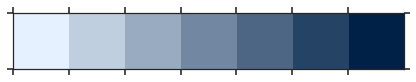

In [91]:
pa = sb.light_palette(cp[0], n_colors=7)
sb.palplot(pa)

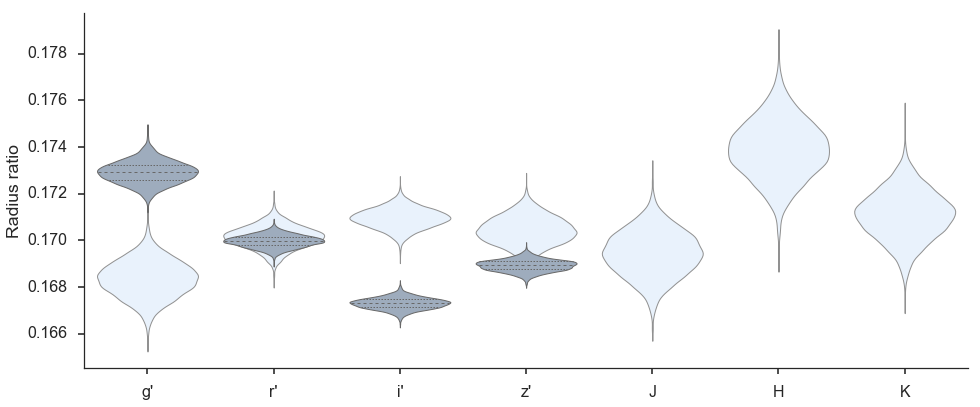

In [97]:
sb.set_style('ticks')
sb.set_context('poster')
fig,ax = pl.subplots(1, 1, figsize=(14,6))
sb.violinplot(sqrt(fce['k2_g k2_r k2_i k2_z k2_J k2_H k2_K'.split()]), inner=None, 
              color=pa[0], linewidth=1, scale='width', ax=ax)
sb.violinplot(sqrt(fco['k2_g k2_r k2_i k2_z'.split()]), inner='quartile', scale='width', ax=ax, linewidth=1, color=pa[2])
setp(ax, xlim=(-0.5,6.5), xticks=arange(7), xticklabels="g' r' i' z' J H K".split(), ylabel='Radius ratio');
sb.despine(fig)
fig.tight_layout()
fig.savefig('../plots/poster_bb_ks.pdf')

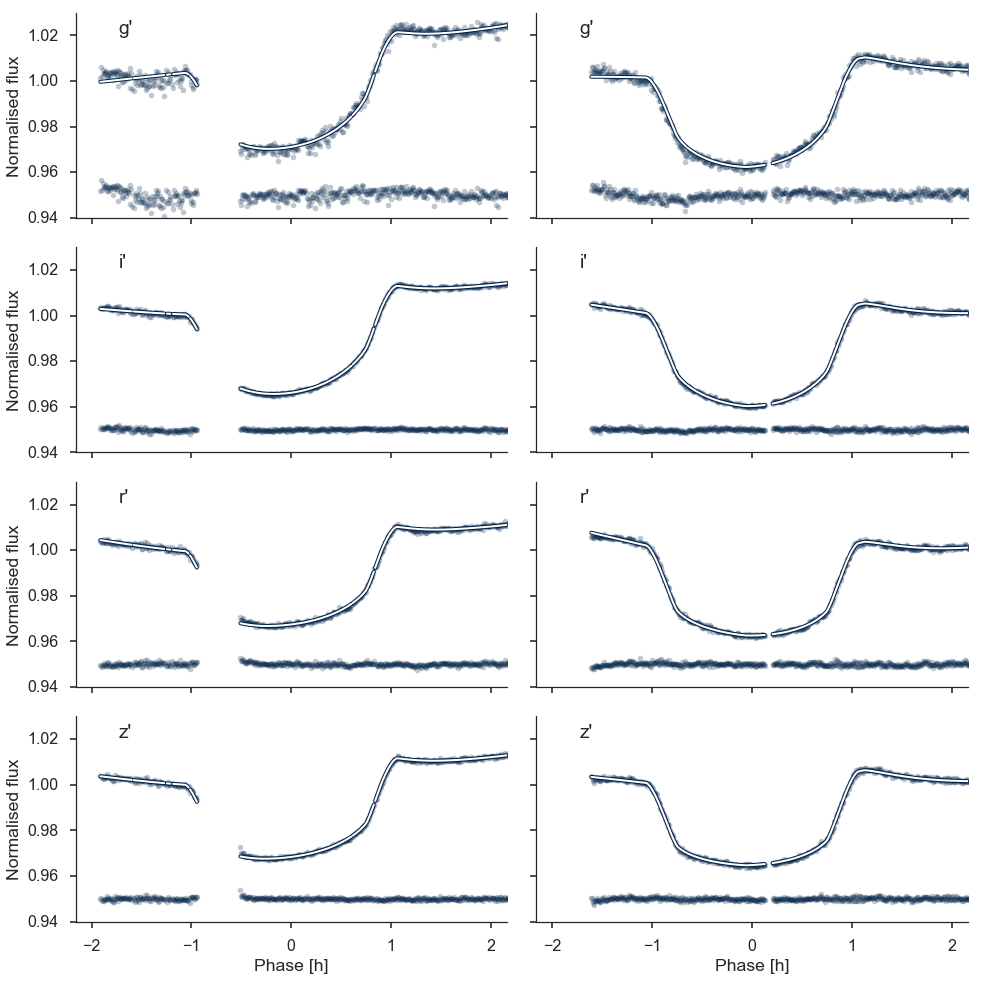

In [101]:
tf = [full(m.shape, nan) for m in lpf.masks]
tt = [full(m.shape, nan) for m in lpf.masks]

fig,axs = subplots(4,2,figsize=(14,14), sharey=True, sharex=True)
pv = median(fco.values, 0)
fms = lpf.compute_lc_model(pv)
fos = lpf.fluxes
for i in range(2):
    for j in range(4):
        ilc = 4*i+j
        phase = (fold(lpf.times[ilc], pv[1], pv[0], 0.5) - 0.5) * pv[1] * 24
        tf[i][lpf.masks[i]] = fms[ilc]
        tt[i][lpf.masks[i]] = phase
        res = fos[ilc]-fms[ilc]
        axs[j,i].plot(phase, fos[ilc], '.', c=cp[0], alpha=0.25)
        axs[j,i].plot(phase, res+0.95, '.', alpha=0.25, c=cp[0])
        axs[j,i].plot(tt[i], tf[i], '-', c=cp[0], lw=4)
        axs[j,i].plot(tt[i], tf[i], '-', c='w', lw=2)
[[ax.text(0.1,0.9, pb, transform=ax.transAxes) for ax,pb in zip(axs[:,i], "g' i' r' z'".split())] for i in range(2)]
setp(axs, ylim=(0.94,1.03), xlim=(-24*0.09,24*0.09))
setp(axs[:,0], ylabel='Normalised flux')
setp(axs[-1,:], xlabel='Phase [h]')
sb.despine(fig)
fig.tight_layout()
fig.savefig('../plots/poster_gtc_lcs.pdf')
fig.savefig('../plots/poster_gtc_lcs.png', dpi=200)